In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
import gstools as gs
from gstools import SRF, Exponential, Matern, Gaussian

# Interlayer variability

0.037378458229813574 0.08189540891926045 0.14268513559484508


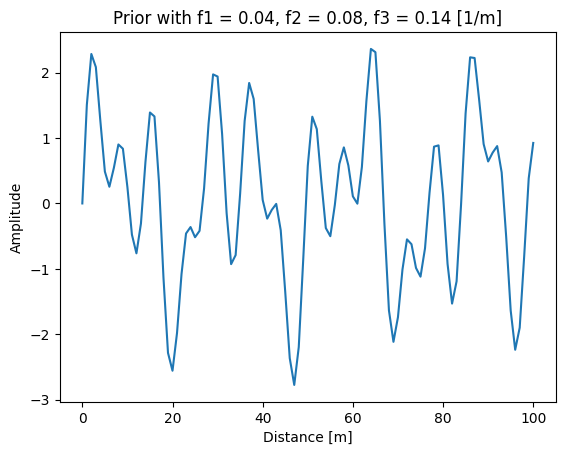

In [21]:
# Use of frequencies
x = np.linspace(0,100,101)

# Parameters
freq1 = np.random.uniform(1/60, 1/20)
freq2 = np.random.uniform(1/20, 1/10)
freq3 = np.random.uniform(1/10, 1/5)
print(freq1, freq2, freq3)

# Create sinusoidal signals
y_add = np.sin(2 * np.pi * freq1 * x) + np.sin(2 * np.pi * freq2 * x) + np.sin(2 * np.pi * freq3 * x)

# Normalize the signal to have a maximum amplitude of 1
#y_add_normalized = y_add / np.max(np.abs(y_add))

y_prior = y_add


plt.plot(x, y_prior)
plt.title('Prior with f1 = %.2f, f2 = %.2f, f3 = %.2f [1/m]' % (freq1, freq2, freq3))
plt.xlabel("Distance [m]")
plt.ylabel("Amplitude")
plt.show()

In [22]:
# Create height model
cond_pos = np.random.choice(x, 1)
cond_z = np.random.uniform(5, 145)
drift_cond_val = y_prior[np.where(x == cond_pos)]

# Create covariance model
rH = 50
cov_model = Exponential(dim=1, var=1, len_scale=rH)

# Create Conditional RF
krig = gs.krige.Ordinary(cov_model, cond_pos, cond_z)
crf = gs.CondSRF(krig, normalizer=gs.normalizer.LogNormal)
crf.set_pos(x)

c:\Users\kurt-\miniconda3\envs\ML\Lib\site-packages\gstools\field\generator.py:227: UserWarning: gstools.RandMeth: **kwargs are ignored
  warnings.warn("gstools.RandMeth: **kwargs are ignored")


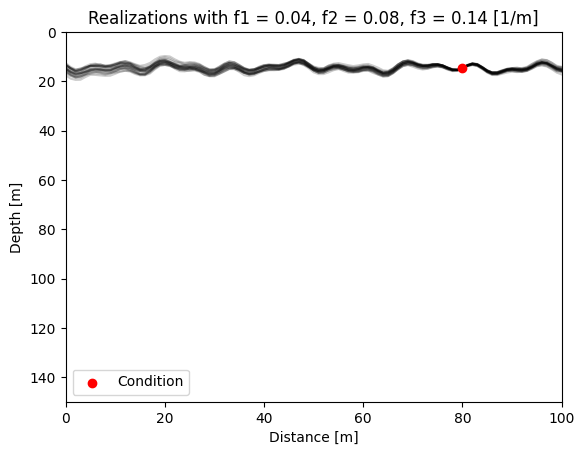

In [23]:
# Create realizations
seed = gs.random.MasterRNG(1234)

realizations = []
for i in range(20):
    realization = crf(seed=seed())
    # Multiply by the drift
    realization = realization + y_prior
    realizations.append(realization)

for i, realization in enumerate(realizations):
    plt.plot(x, realization, color="k", alpha=0.2)

plt.scatter(cond_pos, cond_z, color='r', label='Condition', zorder=10)
plt.ylim([0, 150])
plt.xlim([0, 100])
plt.gca().invert_yaxis()
plt.title('Realizations with f1 = %.2f, f2 = %.2f, f3 = %.2f [1/m]' % (freq1, freq2, freq3))
plt.xlabel("Distance [m]")
plt.ylabel("Depth [m]")
plt.legend()
plt.show()

In [24]:
# Using Gaussain drift
mean_T = 0
std_T = 0.1

t_model = norm(loc=mean_T, scale=std_T)
drift_cond_val = t_model.rvs(1)

# Create Conditional RF
krig = gs.krige.Ordinary(cov_model, cond_pos, cond_z)
crf = gs.CondSRF(krig, normalizer=gs.normalizer.LogNormal)
crf.set_pos(x)

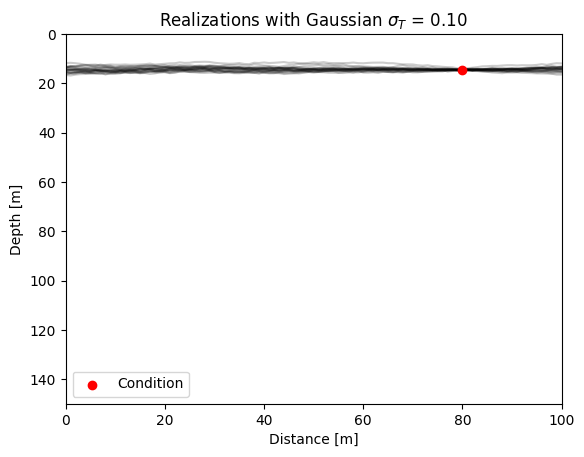

In [25]:
# Create realizations
realizations = []
for i in range(20):
    drift_realization = t_model.rvs(len(x), random_state=seed())
    realization = crf(x, seed=seed()) + drift_realization
    realizations.append(realization)

for i, realization in enumerate(realizations):
    plt.plot(x, realization, color="k", alpha=0.2)

plt.scatter(cond_pos, cond_z, color='r', label='Condition', zorder=10)
plt.ylim([0, 150])
plt.xlim([0, 100])
plt.gca().invert_yaxis()
plt.title(r'Realizations with Gaussian $\sigma_T$ = %.2f' % std_T)
plt.xlabel("Distance [m]")
plt.ylabel("Depth [m]")
plt.legend()
plt.show() 


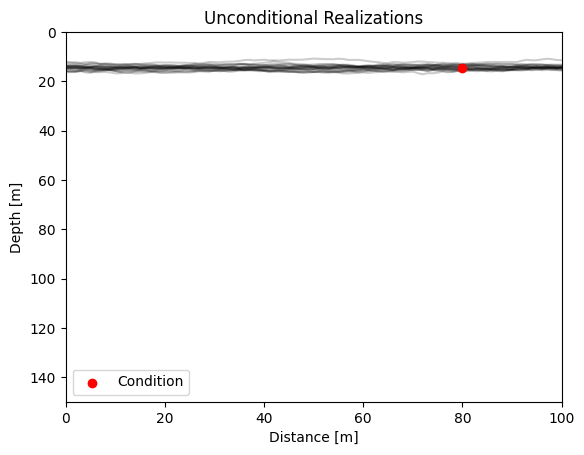

In [26]:
# Unconditional random field
srf = SRF(cov_model, seed=seed())
srf.set_pos(x)

realizations = []
for i in range(20):
    realization = srf(seed=seed()) + cond_z
    realizations.append(realization)

for i, realization in enumerate(realizations):
    plt.plot(x, realization, color="k", alpha=0.2)

plt.scatter(cond_pos, cond_z, color='r', label='Condition', zorder=10)
plt.ylim([0, 150])
plt.xlim([0, 100])
plt.gca().invert_yaxis()
plt.title('Unconditional Realizations')
plt.xlabel("Distance [m]")
plt.ylabel("Depth [m]")
plt.legend()
plt.show()

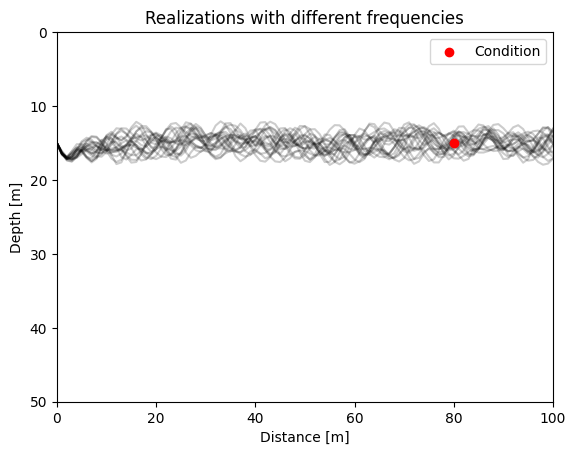

In [27]:
# Realizations
cond_z = 15
realizations = []
for i in range(20):
    # Parameters
    freq1 = np.random.uniform(1/60, 1/20)
    freq2 = np.random.uniform(1/20, 1/10)
    freq3 = np.random.uniform(1/10, 1/5)

    # Create sinusoidal signals
    y_add = np.sin(2 * np.pi * freq1 * x) + np.sin(2 * np.pi * freq2 * x) + np.sin(2 * np.pi * freq3 * x)

    # Plot
    plt.plot(x, y_add + cond_z, color="k", alpha=0.2)

plt.scatter(cond_pos, cond_z, color='r', label='Condition', zorder=10)
plt.ylim([0, 50])
plt.xlim([0, 100])
plt.gca().invert_yaxis()
plt.title('Realizations with different frequencies')
plt.xlabel("Distance [m]")
plt.ylabel("Depth [m]")
plt.legend()


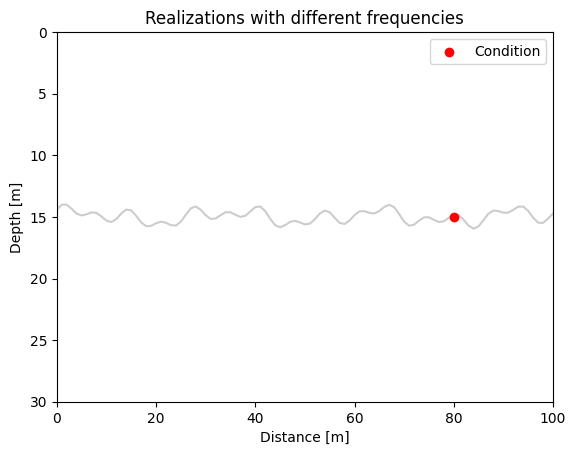

In [38]:
# Realizations
cond_z = 15
realizations = []
for i in range(20):
    # Parameters
    offset = np.random.uniform(0, 10)
    freq1 = np.random.uniform(1/60, 1/20)
    freq2 = np.random.uniform(1/20, 1/10)
    freq3 = np.random.uniform(1/10, 1/5)

    # Create sinusoidal signals
    y_add = np.sin(2 * np.pi * freq1 * x + offset) + np.sin(2 * np.pi * freq2 * x + offset) + np.sin(2 * np.pi * freq3 * x + offset)
    # Normalize the signal to have a maximum amplitude of 1
    y_add_normalized = y_add / np.max(np.abs(y_add))
    # Prior
    y_prior = y_add_normalized
    # Plot
    plt.plot(x, y_prior + cond_z, color="k", alpha=0.2)
    break

plt.scatter(cond_pos, cond_z, color='r', label='Condition', zorder=10)
plt.ylim([0, 30])
plt.xlim([0, 100])
plt.gca().invert_yaxis()
plt.title('Realizations with different frequencies')
plt.xlabel("Distance [m]")
plt.ylabel("Depth [m]")
plt.legend()
